# Interictal Features

We explore the AR coefficient response to 45 mins sampled intervals of interictal data.

In [1]:
import os
import re
import mne
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
root = '/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/chb01/'

In [12]:
# filter out files from preictal class
regex = re.compile(r'^(chb01_03\.edf|chb01_04\.edf|chb01_15\.edf|' \
                   'chb01_16\.edf|chb01_18\.edf|chb01_26\.edf)|\.(seizures)|\.(txt)|\.(html)$')
interictal_files = [root+x for x in os.listdir(root) if not regex.search(x)]

## Visualise EEG

In [52]:
# plot parameters
plot_kwargs = {
    'scalings': dict(eeg=25e-5), # manually set scale to 500 uV for 'best' representation
    'show_scrollbars': False,
    'show_scalebars': False,
    'show': True
}

In [53]:
np.random.seed(42)
index = np.random.randint(len(interictal_files))
print(interictal_files[index])
raw = mne.io.read_raw_edf(input_fname=interictal_files[index], preload=False, verbose='Error')
raw_crop = raw.copy()

/Volumes/My Passport/AI_Research/data/physionet.org/files/chbmit/1.0.0/chb01/chb01_37.edf


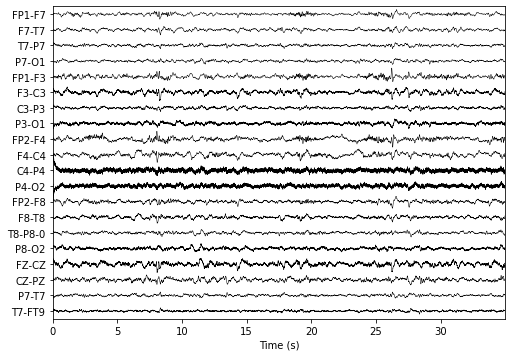

In [56]:
fig = raw.plot(start=0, duration=35, **plot_kwargs);

In [59]:
fig.savefig('../figures/feature_extraction/interictal_sample_chb01_37.pdf')

## Visualise AR Response